 # PROJECT ON CUSTOMER CHURN FOR DTH INDUSTRY

# Data preparation

**Importing key libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading data**

In [2]:
import os;
os.listdir('/kaggle/input')

['churn-data-set']

In [3]:
data = pd.read_csv('/kaggle/input/churn-data-set/Raw data R3.csv')

#Displaying first rows

print(data.head())

   AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1     4.0        3.0              6.0   Debit Card  Female   
1      20001      1     0.0        1.0              8.0          UPI    Male   
2      20002      1     0.0        1.0             30.0   Debit Card    Male   
3      20003      1     0.0        3.0             15.0   Debit Card    Male   
4      20004      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single      

In [4]:
# Display unique values for each specified column
columns = ['City_Tier','Payment', 'Gender', 'account_segment','Marital_Status','Login_device']

unique_values = {col: data[col].unique() for col in columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")

City_Tier: [ 3.  1. nan  2.]
Payment: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Gender: ['Female' 'Male' nan]
account_segment: ['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']
Marital_Status: ['Single' 'Divorced' 'Married' nan]
Login_device: ['Mobile' 'Computer' nan]


In [5]:
# Convert 'cashback' column to float
data['cashback'] = pd.to_numeric(data['cashback'], errors='coerce')

In [6]:
print(data.describe)

<bound method NDFrame.describe of        AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1     4.0        3.0              6.0   Debit Card   
1          20001      1     0.0        1.0              8.0          UPI   
2          20002      1     0.0        1.0             30.0   Debit Card   
3          20003      1     0.0        3.0             15.0   Debit Card   
4          20004      1     0.0        1.0             12.0  Credit Card   
...          ...    ...     ...        ...              ...          ...   
10977      31255      0    10.0        1.0             34.0  Credit Card   
10978      31256      0    13.0        1.0             19.0  Credit Card   
10979      31257      0     1.0        1.0             14.0   Debit Card   
10980      31258      0    23.0        3.0             11.0  Credit Card   
10981      31259      0     8.0        1.0             22.0  Credit Card   

       Gender  Service_Score  Account_user_count acco

In [7]:
#Displaying null values
print(data.isnull().sum())
print(data.isnull().sum().sum())

AccountID                    0
Churn                        0
Tenure                     216
City_Tier                  112
CC_Contacted_LY            101
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         442
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              789
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       357
cashback                   472
Login_device               220
dtype: int64
3812


**Handling missing values on case basis**

In [8]:
# List of columns to removed NA values
columns_to_check = ['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'Login_device']

# Remove rows where any of these columns have NA values
data = data.dropna(subset=columns_to_check)

In [9]:
# Replace missing values in 'City_Tier' with the mode
city_mode = data['City_Tier'].mode()[0]
data.loc[:, 'City_Tier'] = data['City_Tier'].fillna(city_mode)

# Replace missing values in 'Complain_ly' with the mode
complain_mode = data['Complain_ly'].mode()[0]
data.loc[:, 'Complain_ly'] = data['Complain_ly'].fillna(complain_mode)

In [10]:
columns = ['CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'rev_growth_yoy', 'Day_Since_CC_connect', 'rev_per_month','cashback','coupon_used_for_payment']

for x in columns:
    # Calculate the mean for the column and round it
    x_mean = round(data[x].mean(), 0)
    
    # Fill NaN values with the mean
    data.loc[:, x] = data[x].fillna(x_mean)

Check for any missing values

In [11]:
print(data.isnull().sum())
print(data.isnull().sum().sum())

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64
0


#No missing values found, we can proceed with data analysis

In [12]:
# Display unique values for each specified column
columns = ['City_Tier','Payment', 'Gender', 'account_segment','Marital_Status','Login_device']

unique_values = {col: data[col].unique() for col in columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")

City_Tier: [3. 1. 2.]
Payment: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender: ['Female' 'Male']
account_segment: ['Super' 'Regular Plus' 'Regular' 'HNI' 'Super Plus']
Marital_Status: ['Single' 'Divorced' 'Married']
Login_device: ['Mobile' 'Computer']


In [13]:
print(data.shape)

(9578, 19)


# **Univariate analysis**

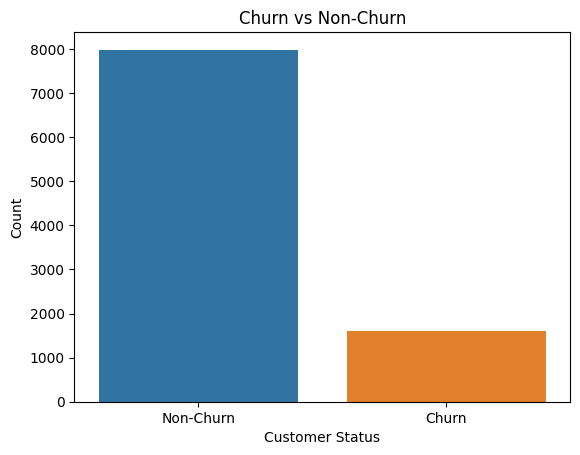

In [14]:
#Split of churn

sns.countplot(x='Churn', data=data)
plt.xticks([0, 1], ['Non-Churn', 'Churn'])
plt.title('Churn vs Non-Churn')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()


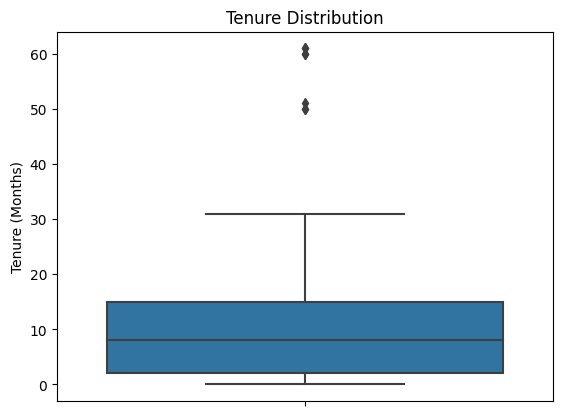

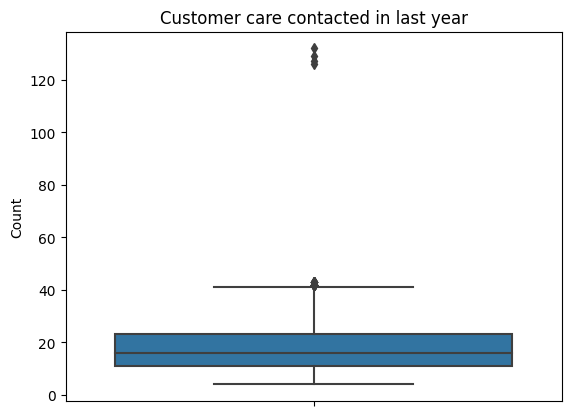

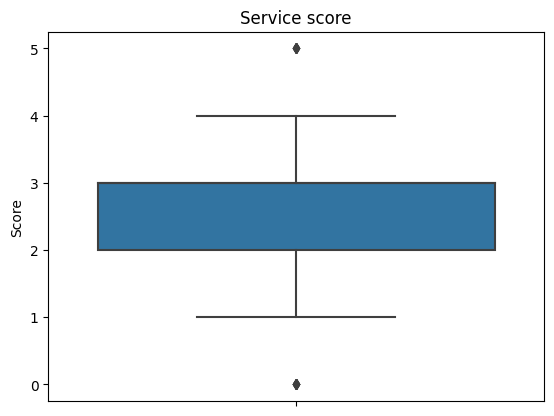

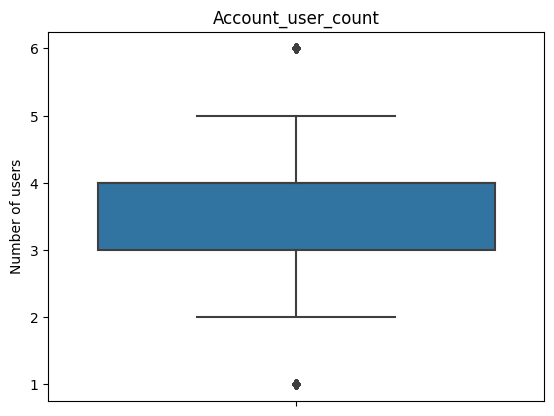

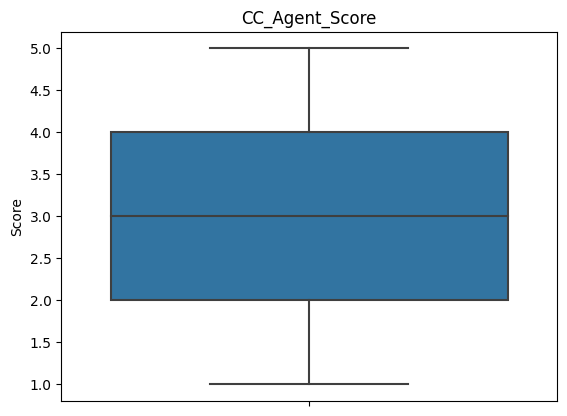

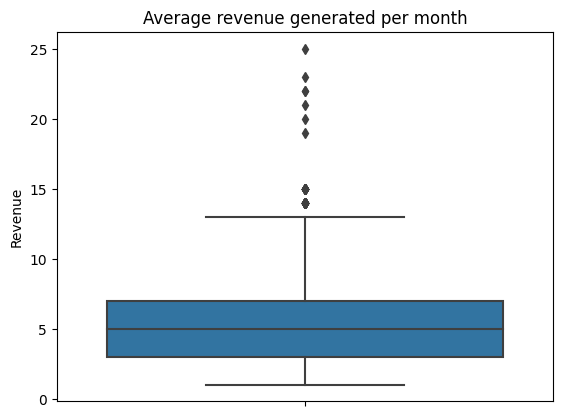

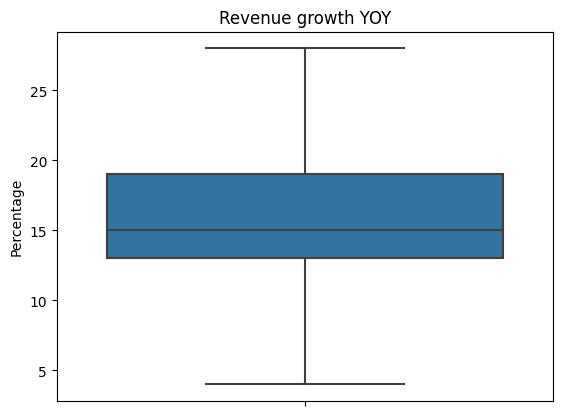

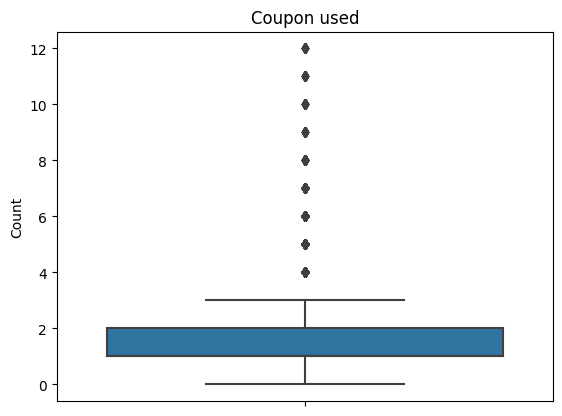

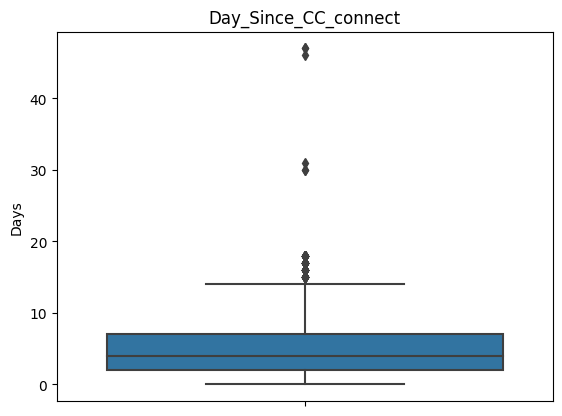

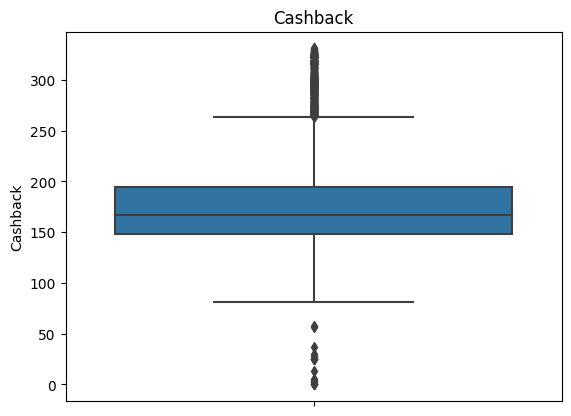

In [15]:
#Plotting box plots for Tenure, CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,
#rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback

sns.boxplot(y='Tenure', data=data)
plt.title('Tenure Distribution')
plt.ylabel('Tenure (Months)')
plt.show()

sns.boxplot(y='CC_Contacted_LY', data=data)
plt.title('Customer care contacted in last year')
plt.ylabel('Count')
plt.show()

sns.boxplot(y='Service_Score', data=data)
plt.title('Service score')
plt.ylabel('Score')
plt.show()

sns.boxplot(y='Account_user_count', data=data)
plt.title('Account_user_count')
plt.ylabel('Number of users')
plt.show()

sns.boxplot(y='CC_Agent_Score', data=data)
plt.title('CC_Agent_Score')
plt.ylabel('Score')
plt.show()

sns.boxplot(y='rev_per_month', data=data)
plt.title('Average revenue generated per month')
plt.ylabel('Revenue')
plt.show()

sns.boxplot(y='rev_growth_yoy', data=data)
plt.title('Revenue growth YOY')
plt.ylabel('Percentage')
plt.show()

sns.boxplot(y='coupon_used_for_payment', data=data)
plt.title('Coupon used')
plt.ylabel('Count')
plt.show()

sns.boxplot(y='Day_Since_CC_connect', data=data)
plt.title('Day_Since_CC_connect')
plt.ylabel('Days')
plt.show()

sns.boxplot(y='cashback', data=data)
plt.title('Cashback')
plt.ylabel('Cashback')
plt.show()

**Conclusions**
* 

# Multivariate analysis

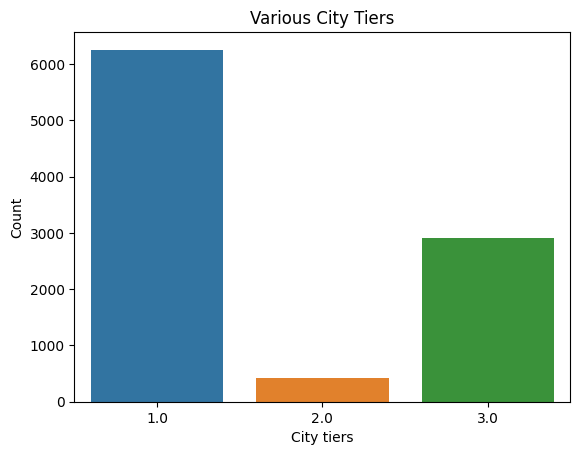

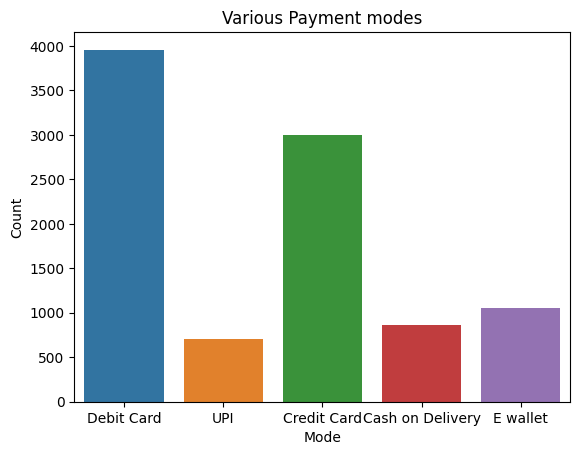

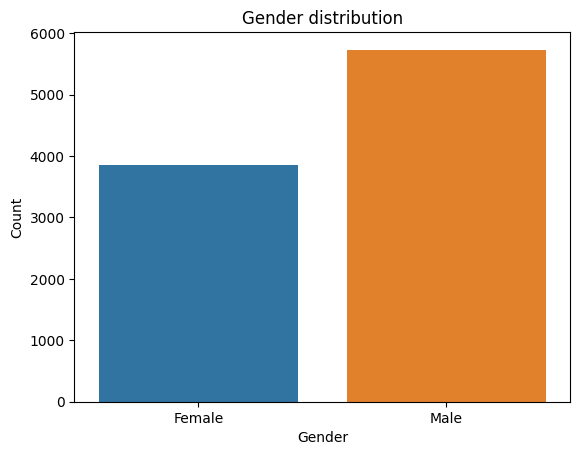

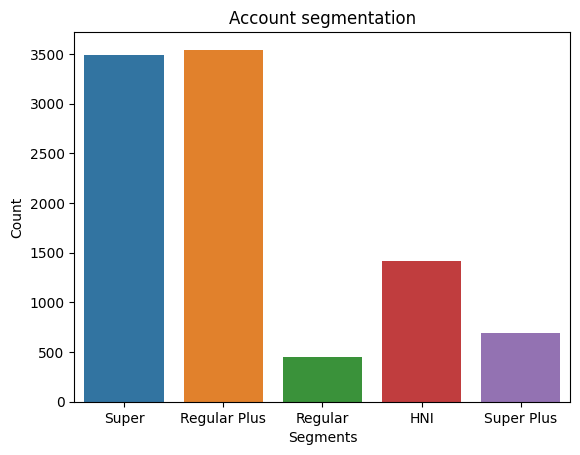

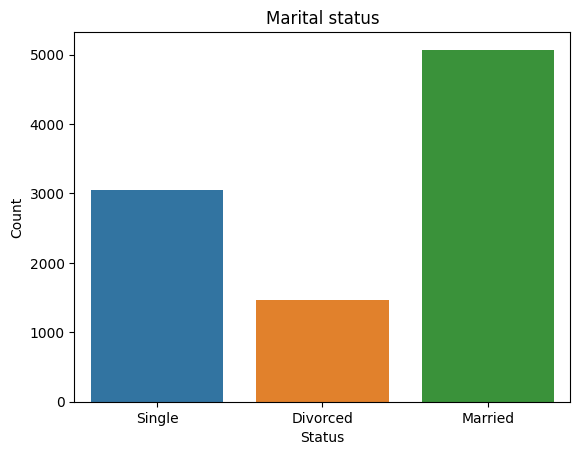

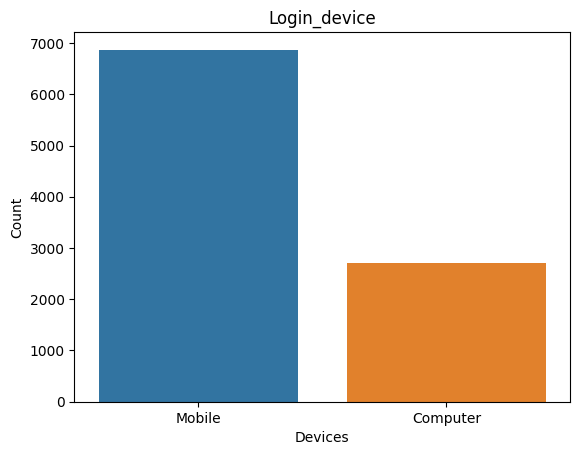

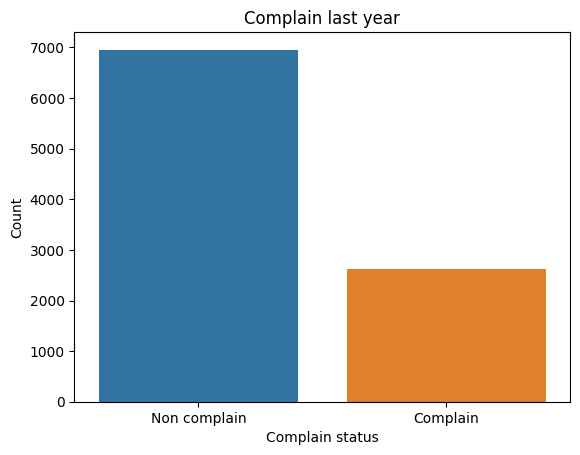

In [16]:
#City tier distribution
sns.countplot(x='City_Tier', data=data)
plt.title('Various City Tiers')
plt.xlabel('City tiers')
plt.ylabel('Count')
plt.show()

#Payment mode distribution
sns.countplot(x='Payment', data=data)
plt.title('Various Payment modes')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

#Gender distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Account segment distribution
sns.countplot(x='account_segment', data=data)
plt.title('Account segmentation')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.show()

#Marital status distribution
sns.countplot(x='Marital_Status', data=data)
plt.title('Marital status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


#Login device distribution
sns.countplot(x='Login_device', data=data)
plt.title('Login_device')
plt.xlabel('Devices')
plt.ylabel('Count')
plt.show()

#Complain last year churn
sns.countplot(x='Complain_ly', data=data)
plt.xticks([0, 1], ['Non complain', 'Complain'])
plt.title('Complain last year')
plt.xlabel('Complain status')
plt.ylabel('Count')
plt.show()


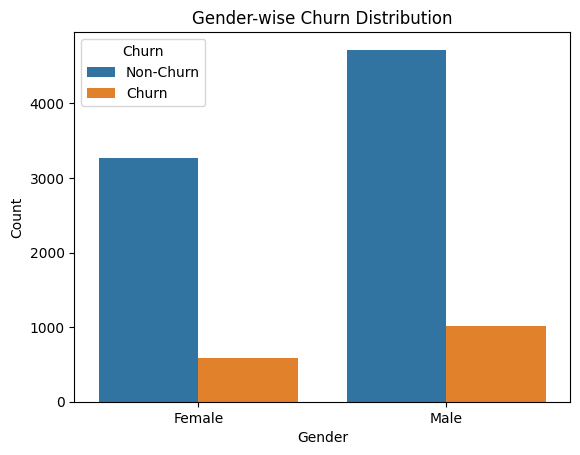

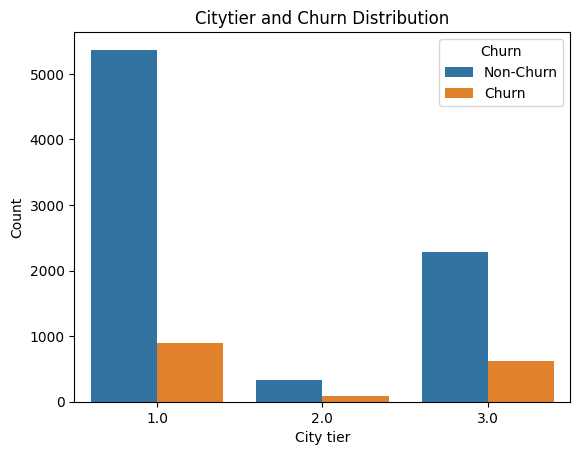

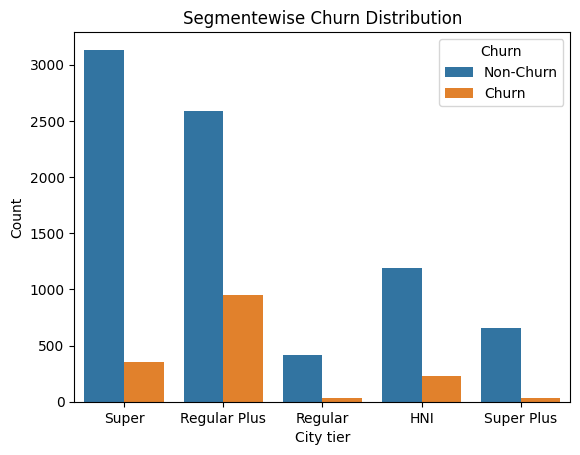

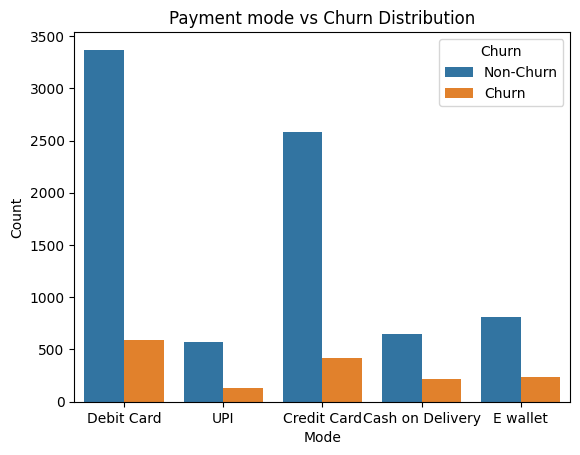

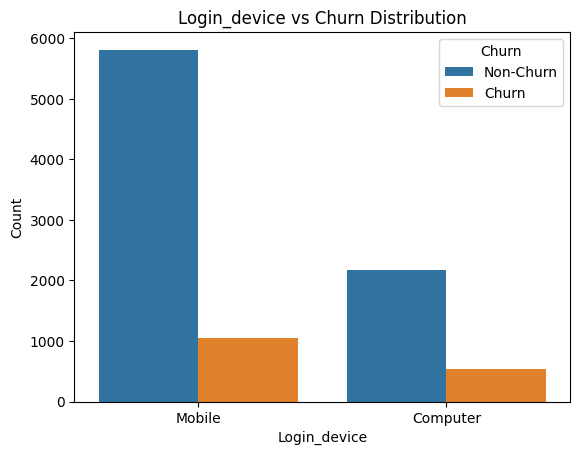

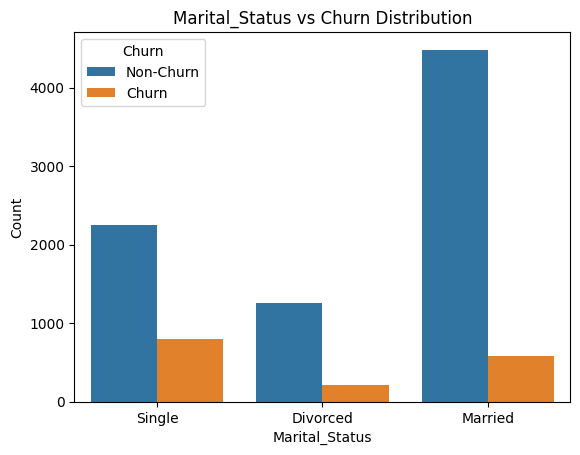

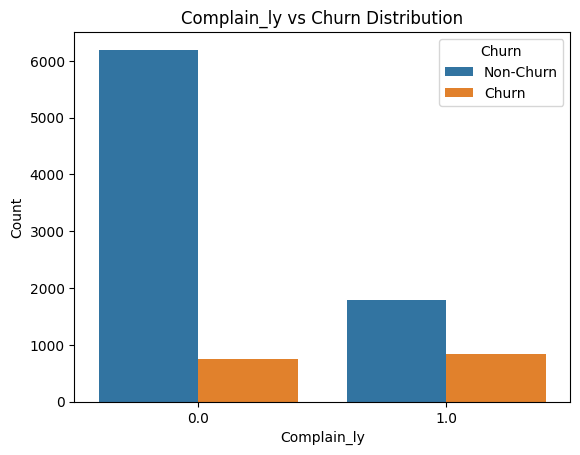

In [17]:
#Genderwise churn

sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Gender-wise Churn Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

#Citytierwise churn

sns.countplot(x='City_Tier', hue='Churn', data=data)
plt.title('Citytier and Churn Distribution')
plt.xlabel('City tier')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

#Segmentwise churn

sns.countplot(x='account_segment', hue='Churn', data=data)
plt.title('Segmentewise Churn Distribution')
plt.xlabel('City tier')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

#Paymentwise churn

sns.countplot(x='Payment', hue='Churn', data=data)
plt.title('Payment mode vs Churn Distribution')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

#Login_devicewise churn

sns.countplot(x='Login_device', hue='Churn', data=data)
plt.title('Login_device vs Churn Distribution')
plt.xlabel('Login_device')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

#Marital_Statuswise churn

sns.countplot(x='Marital_Status', hue='Churn', data=data)
plt.title('Marital_Status vs Churn Distribution')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

#Complain wise churn

sns.countplot(x='Complain_ly', hue='Churn', data=data)
plt.title('Complain_ly vs Churn Distribution')
plt.xlabel('Complain_ly')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

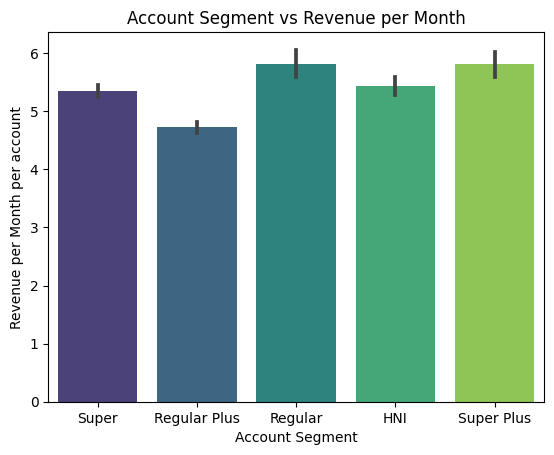

In [18]:
#Segmentwise revenue

sns.barplot(x='account_segment', y='rev_per_month', data=data, palette='viridis')
plt.xlabel('Account Segment')
plt.ylabel('Revenue per Month per account')
plt.title('Account Segment vs Revenue per Month')
plt.show()


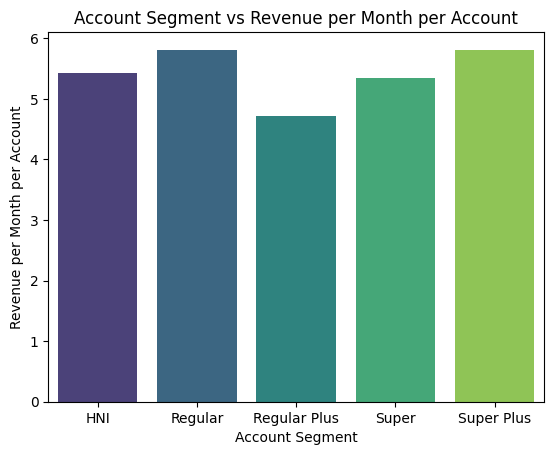

In [19]:
# Calculate revenue per account for each segment
aggregated_data = data.groupby('account_segment').agg({
    'rev_per_month': 'sum',
    'AccountID': 'count'  
}).reset_index()

# Calculate revenue per account
aggregated_data['rev_per_month_per_account'] = aggregated_data['rev_per_month'] / aggregated_data['AccountID']

# Create the bar plot
sns.barplot(x='account_segment', y='rev_per_month_per_account', data=aggregated_data, palette='viridis')
plt.xlabel('Account Segment')
plt.ylabel('Revenue per Month per Account')
plt.title('Account Segment vs Revenue per Month per Account')
plt.show()


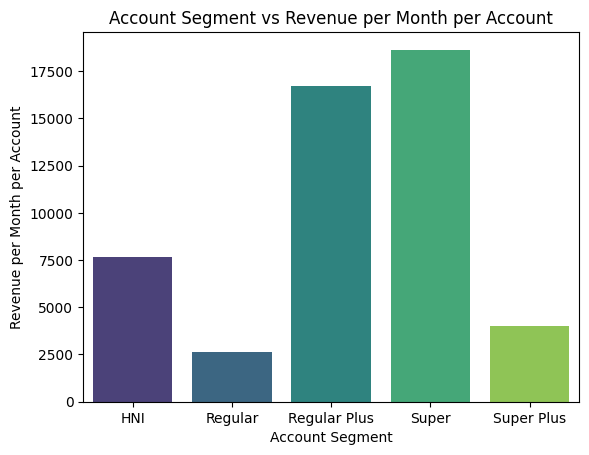

In [20]:
# Calculate revenue per account for each segment
aggregated_data = data.groupby('account_segment').agg({
    'rev_per_month': 'sum',
    'AccountID': 'count'  
}).reset_index()

# Calculate revenue per account
aggregated_data['rev_per_month_account'] = aggregated_data['rev_per_month']

# Create the bar plot
sns.barplot(x='account_segment', y='rev_per_month_account', data=aggregated_data, palette='viridis')
plt.xlabel('Account Segment')
plt.ylabel('Revenue per Month per Account')
plt.title('Account Segment vs Revenue per Month per Account')
plt.show()


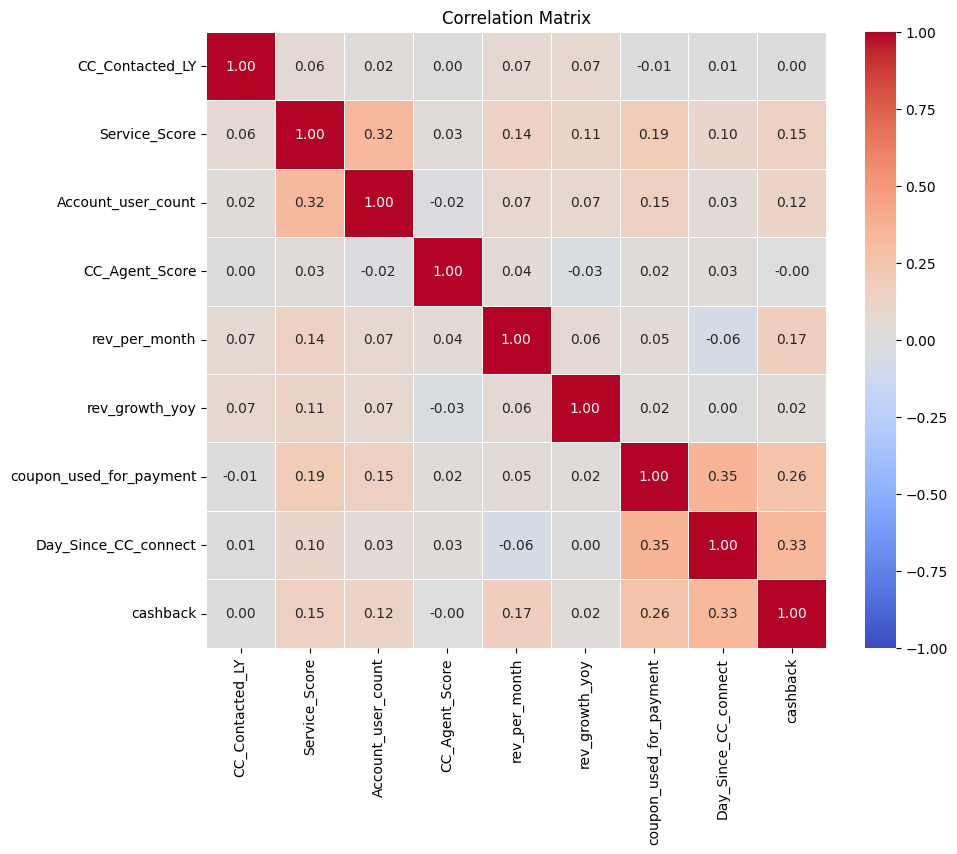

In [21]:
#Correlations in numerical variables

# Select specific columns
data_numerical = data[['CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month','rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']]

# Compute the correlation matrix
correlation_matrix = data_numerical.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


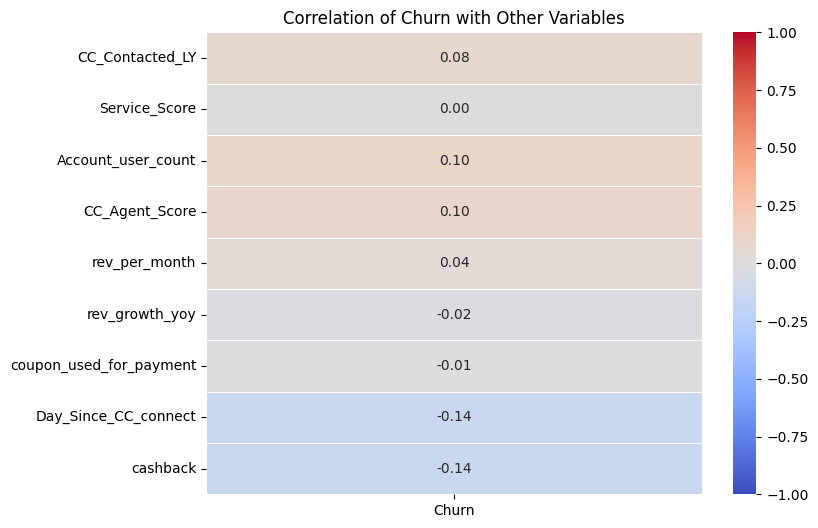

In [22]:
#Correlations of churn with other numerical variables

# Select specific columns
data_numerical_churn = data[['Churn','CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']]

# Compute the correlation matrix
correlation_matrix_c = data_numerical_churn.corr()

# Extract correlation of 'churn' with other variables
churn_correlation = correlation_matrix_c[['Churn']].drop('Churn')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(churn_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation of Churn with Other Variables')
plt.show()



# Model fitting

Converting categorical variables to factors

In [23]:
# One-Hot Encode Categorical Variables

data = pd.get_dummies(data, columns=['City_Tier', 'Payment', 'Gender','account_segment','Marital_Status', 'Complain_ly', 'Login_device'], drop_first=True)


In [24]:
print(data.columns.unique())

Index(['AccountID', 'Churn', 'Tenure', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'City_Tier_2.0', 'City_Tier_3.0', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super Plus',
       'Marital_Status_Married', 'Marital_Status_Single', 'Complain_ly_1.0',
       'Login_device_Mobile'],
      dtype='object')


Splitting data to train and test in 80:20

In [25]:
#Split the Data
#Divide the dataset into features and target, then split into training and test sets

from sklearn.model_selection import train_test_split

X = data.drop(['Churn', 'AccountID'], axis=1)  # Features
y = data['Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Checking shape
print(data.shape)
print(X_train.shape)
print(X_test.shape)
print(X_train.head(3))

(9578, 27)
(7662, 25)
(1916, 25)
      Tenure  CC_Contacted_LY  Service_Score  Account_user_count  \
8369    20.0             16.0            4.0                 6.0   
391     13.0             14.0            2.0                 3.0   
5959     0.0             14.0            2.0                 4.0   

      CC_Agent_Score  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
8369             4.0            8.0            14.0                      7.0   
391              3.0            4.0            14.0                      1.0   
5959             3.0            2.0            14.0                      0.0   

      Day_Since_CC_connect  cashback  ...  Payment_UPI  Gender_Male  \
8369                   8.0     296.0  ...        False        False   
391                    3.0     168.0  ...        False         True   
5959                   7.0     131.0  ...        False        False   

      account_segment_Regular  account_segment_Regular Plus  \
8369                    F

#Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print(X_train_scaled)

[[ 1.17786266 -0.20897298  1.52205446 ... -0.68294325  1.63226085
   0.62717162]
 [ 0.360781   -0.43338096 -1.24603984 ... -0.68294325  1.63226085
  -1.5944599 ]
 [-1.15665638 -0.43338096 -1.24603984 ... -0.68294325  1.63226085
  -1.5944599 ]
 ...
 [-0.92320447  0.35204698  0.13800731 ... -0.68294325  1.63226085
   0.62717162]
 [-0.92320447 -0.99440092 -1.24603984 ...  1.46425051  1.63226085
   0.62717162]
 [-1.03993043 -0.20897298  0.13800731 ... -0.68294325 -0.61264718
   0.62717162]]


In [28]:
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify the result
print("Scaled Training Data:")
print(X_train_scaled_df.head())

print("\nScaled Test Data:")
print(X_test_scaled_df.head())

Scaled Training Data:
        Tenure  CC_Contacted_LY  Service_Score  Account_user_count  \
8369  1.177863        -0.208973       1.522054            2.255364   
391   0.360781        -0.433381      -1.246040           -0.669585   
5959 -1.156656        -0.433381      -1.246040            0.305398   
3058 -1.039930        -0.657789       1.522054            0.305398   
4041 -0.339575        -0.882197       0.138007            0.305398   

      CC_Agent_Score  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
8369        0.679137       0.977757       -0.583685                 2.840101   
391        -0.056139      -0.411952       -0.583685                -0.414670   
5959       -0.056139      -1.106806       -0.583685                -0.957131   
3058        0.679137      -0.759379       -0.317499                 0.127792   
4041       -0.056139      -0.759379       -1.116057                 0.670254   

      Day_Since_CC_connect  cashback  ...  Payment_UPI  Gender_Male  \
8369 

In [29]:
#print(X_train_scaled_df.mean)

1) Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled_df, y_train)

LogisticRegression()

2) Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled_df, y_train)

RandomForestClassifier()

3) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier()

4) Pruned decision tree

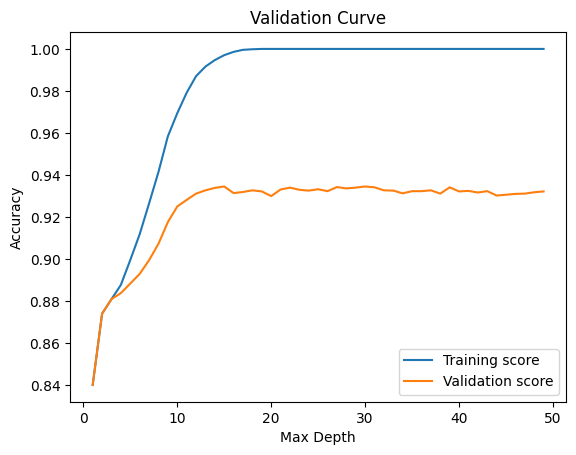

In [33]:
from sklearn.model_selection import validation_curve

param_range = range(1, 50)  # for max_depth

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    X_train_scaled_df, y_train,
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='accuracy'
)

plt.plot(param_range, train_scores.mean(axis=1), label='Training score')
plt.plot(param_range, test_scores.mean(axis=1), label='Validation score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_df, y_train)

best_params = grid_search.best_params_
print(best_params)
print("Best Score:", grid_search.best_score_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9318718395473644


In [35]:
# Train the model with pre-pruning
dt_model_prun = DecisionTreeClassifier(max_depth=20, min_samples_split=2, min_samples_leaf=1)
dt_model_prun.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(max_depth=20)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
path = dt_model_prun.cost_complexity_pruning_path(X_train_scaled_df, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum alpha for simplicity

# Fit models for each alpha
models_alpha = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train_scaled_df, y_train) for alpha in ccp_alphas]

# Find the best alpha based on validation
accuracy_scores = [accuracy_score(y_test, model.predict(X_test_scaled_df)) for model in models_alpha]
best_alpha = ccp_alphas[np.argmax(accuracy_scores)]

In [37]:
# Train final pruned tree
dt_pruned_model = DecisionTreeClassifier(ccp_alpha=best_alpha)
dt_pruned_model.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001186492964096723)

ecisionTreeClassifier(ccp_alpha=0.00025583014270797095)

# Model evaluation

Logistic regression model outcomes

In [38]:
# Model coefficients
coefficients = log_model.coef_[0] 
intercept = log_model.intercept_
odds_ratios = np.exp(coefficients)

# Create a DataFrame for easier viewing
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

print("Coefficients:\n", coef_df)
print("Intercept:", intercept)


Coefficients:
                          Feature  Coefficient  Odds Ratio
0                         Tenure    -1.942517    0.143343
1                CC_Contacted_LY     0.299128    1.348683
2                  Service_Score    -0.077629    0.925307
3             Account_user_count     0.393716    1.482480
4                 CC_Agent_Score     0.346380    1.413940
5                  rev_per_month     0.539835    1.715723
6                 rev_growth_yoy    -0.122841    0.884405
7        coupon_used_for_payment     0.287253    1.332761
8           Day_Since_CC_connect    -0.216340    0.805461
9                       cashback    -0.371523    0.689683
10                 City_Tier_2.0     0.164775    1.179128
11                 City_Tier_3.0     0.314262    1.369249
12           Payment_Credit Card    -0.280534    0.755381
13            Payment_Debit Card    -0.211238    0.809581
14              Payment_E wallet     0.016503    1.016640
15                   Payment_UPI    -0.177799    0.837111

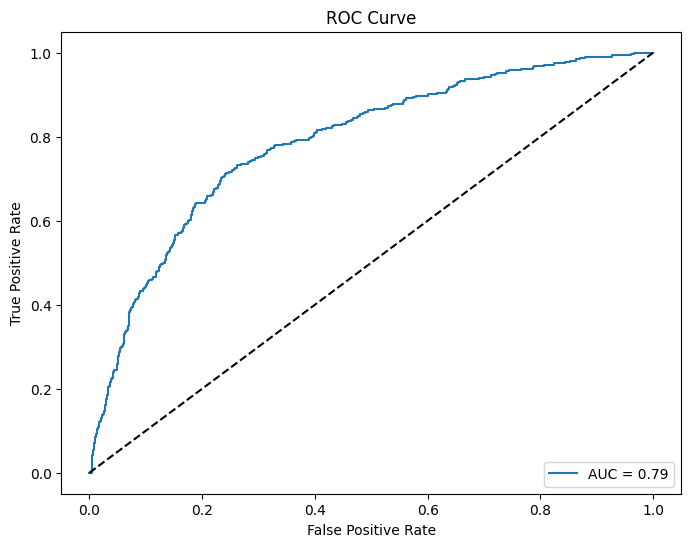

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = log_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
#Calculating ROC score

print(roc_auc_score(y_test, y_prob))

0.7864572151053222


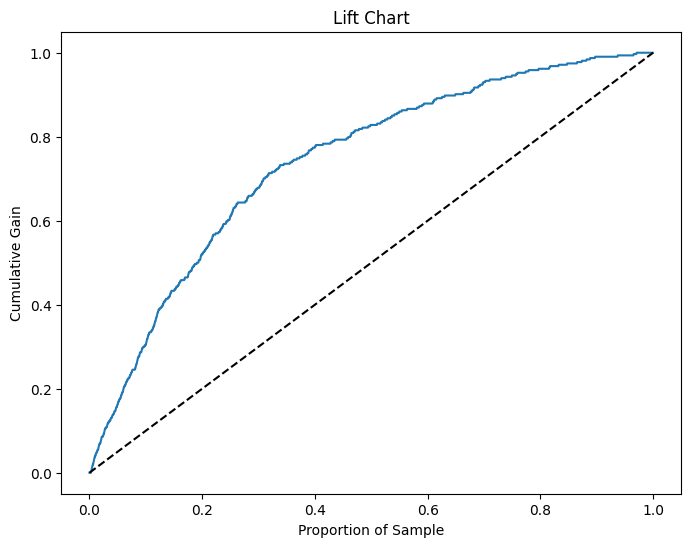

In [41]:
# Create a DataFrame with true and predicted probabilities
df_lift = pd.DataFrame({'y_true': y_test, 'y_prob': y_prob})
df_lift = df_lift.sort_values(by='y_prob', ascending=False)

# Calculate cumulative gains
df_lift['cumulative_positives'] = df_lift['y_true'].cumsum()
df_lift['cumulative_rate'] = df_lift['cumulative_positives'] / df_lift['y_true'].sum()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(df_lift)) / len(df_lift), df_lift['cumulative_rate'])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Proportion of Sample')
plt.ylabel('Cumulative Gain')
plt.title('Lift Chart')
plt.show()

#HL test

In [42]:
#from statsmodels.tools import add_constant
#import statsmodels.api as sm

# Add constant term for intercept
#X_test_const = add_constant(X_test)

# Perform Hosmer-Lemeshow test
#hl_test = sm.stats.diagnostic.ess_test(sm.Logit(y_test, X_test_const).fit(), n_bins=10)
#print("Hosmer-Lemeshow Test Statistic:", hl_test[0])
#print("p-value:", hl_test[1])


**Model comparison**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
models = [log_model, rf_model, dt_model,dt_pruned_model]
#model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'KNN']
model_names = ['Logistic Regression', 'Random Forest','Decision Tree','Pruned decision tree']
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled_df)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.2f}")
    print("\n")

Logistic Regression Accuracy: 0.90
[[1556   46]
 [ 148  166]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1602
           1       0.78      0.53      0.63       314

    accuracy                           0.90      1916
   macro avg       0.85      0.75      0.79      1916
weighted avg       0.89      0.90      0.89      1916

ROC AUC Score: 0.75


Random Forest Accuracy: 0.98
[[1594    8]
 [  31  283]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1602
           1       0.97      0.90      0.94       314

    accuracy                           0.98      1916
   macro avg       0.98      0.95      0.96      1916
weighted avg       0.98      0.98      0.98      1916

ROC AUC Score: 0.95


Decision Tree Accuracy: 0.96
[[1564   38]
 [  35  279]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1602
           1       

#Applying custom threshold

In [44]:
# Custom threshold
custom_threshold = 0.6

# Get probability predictions
y_probs_custom = log_model.predict_proba(X_test_scaled_df)[:, 1]
    
# Apply custom threshold
y_pred_custom = (y_probs_custom >= custom_threshold).astype(int)
    
# Evaluate the model
print(f"{name} Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_custom):.2f}")
print("\n")

Pruned decision tree Accuracy: 0.89
Confusion Matrix:
[[1581   21]
 [ 188  126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1602
           1       0.86      0.40      0.55       314

    accuracy                           0.89      1916
   macro avg       0.88      0.69      0.74      1916
weighted avg       0.89      0.89      0.87      1916

ROC AUC Score: 0.69




**Comparing with training data**

In [45]:
for model, name in zip(models, model_names):
    y_pred_train = model.predict(X_train_scaled_df)
    print(f"{name} Accuracy: {accuracy_score(y_train, y_pred_train):.2f}")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))
    print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train):.2f}")
    print("\n")

Logistic Regression Accuracy: 0.90
[[6175  206]
 [ 592  689]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6381
           1       0.77      0.54      0.63      1281

    accuracy                           0.90      7662
   macro avg       0.84      0.75      0.79      7662
weighted avg       0.89      0.90      0.89      7662

ROC AUC Score: 0.75


Random Forest Accuracy: 1.00
[[6381    0]
 [   0 1281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       1.00      1.00      1.00      1281

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

ROC AUC Score: 1.00


Decision Tree Accuracy: 1.00
[[6381    0]
 [   0 1281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       

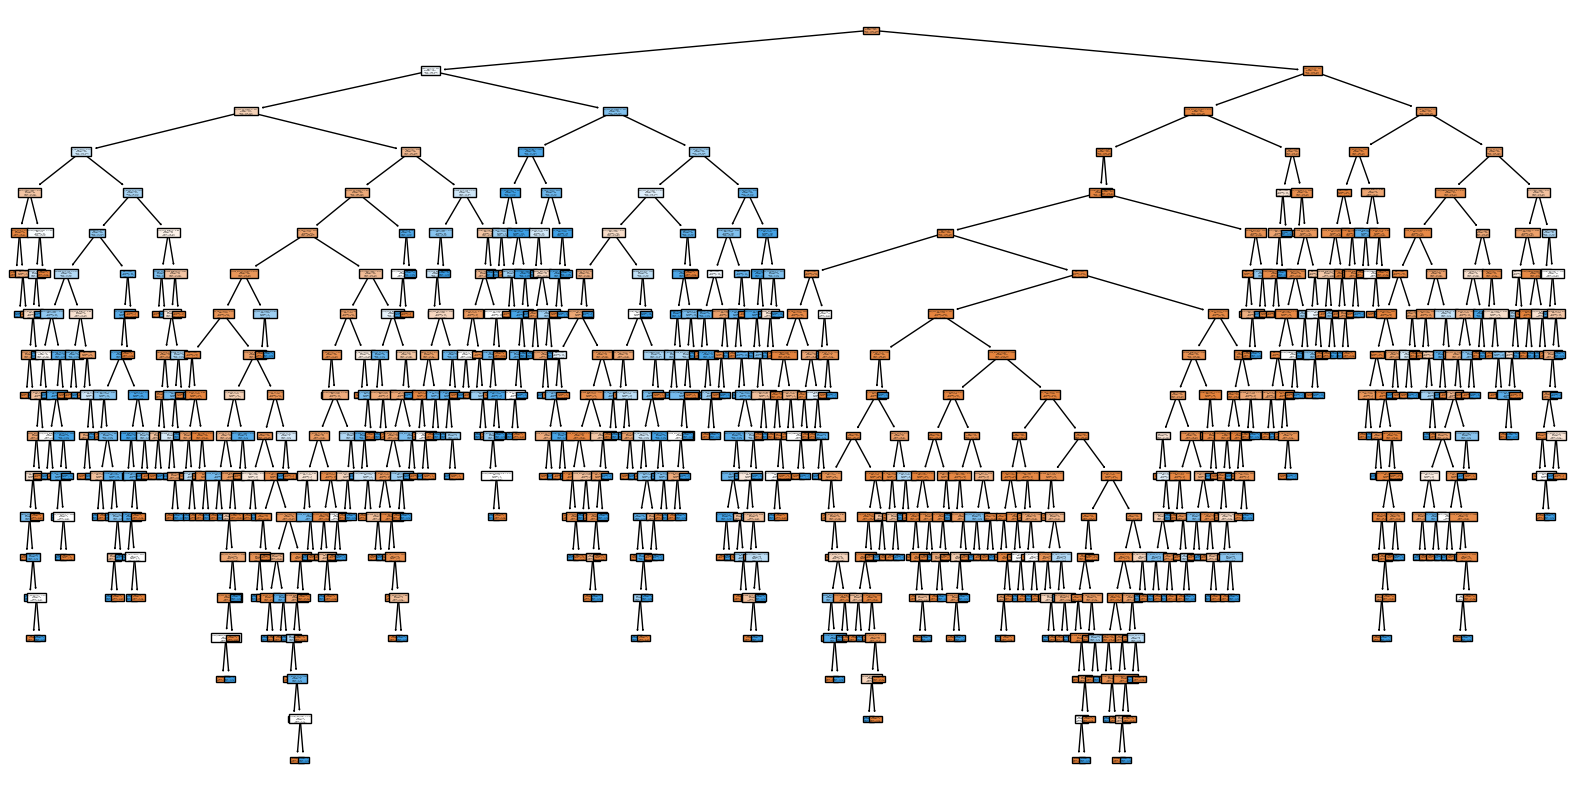

In [46]:
#Plotting decision tree

# Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()


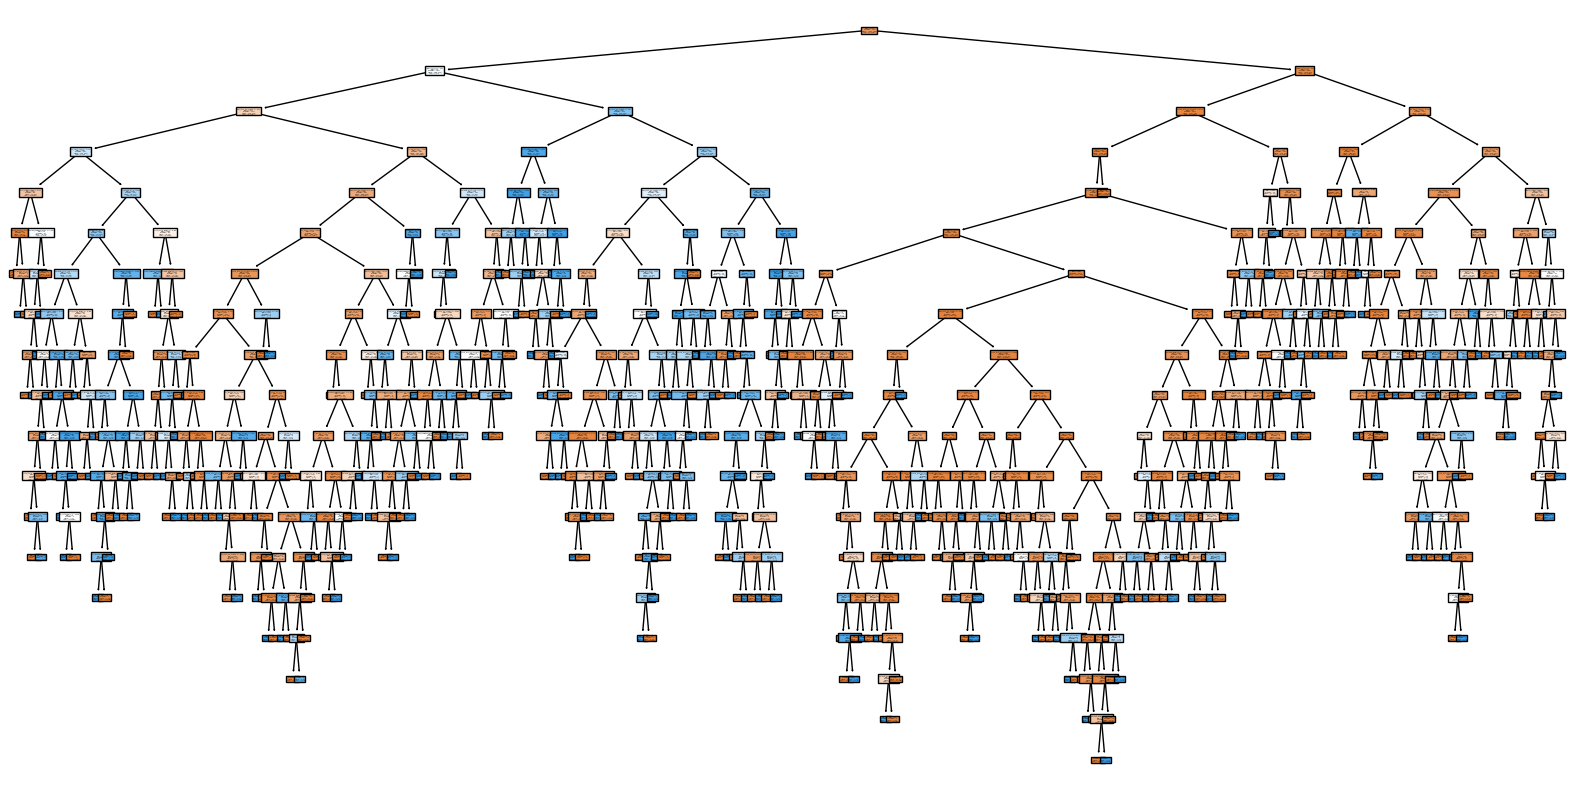

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

**PCA analysis and model fitting**

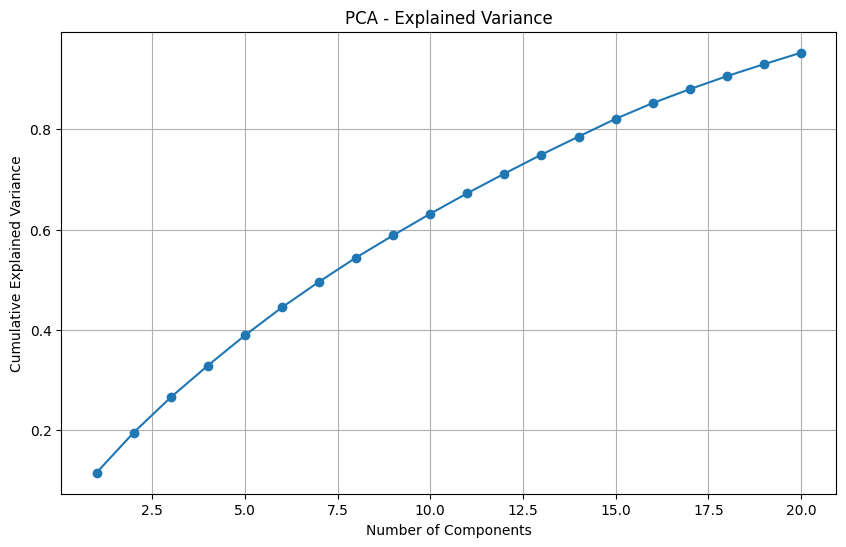

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled_df)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [49]:
#Choose components that explain a desired amount of variance (e.g., 95%)
pca_best = PCA(n_components=0.95)
X_pca_reduced = pca_best.fit_transform(X_train_scaled_df)
X_test_pca = pca_best.transform(X_test_scaled_df)

In [50]:
# Print components
#components = pca.components_
#feature_names = X.columns

#for i, component in enumerate(components):
    #print(f"Component {i+1}:")
    #for feature, value in zip(feature_names, component):
        #print(f"{feature}: {value:.2f}")
    #print("\n")

**Model fitting on Principal components**

In [51]:
log_model_pca = LogisticRegression()
log_model_pca.fit(X_pca_reduced, y_train)

LogisticRegression()

In [52]:
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_pca_reduced, y_train)

RandomForestClassifier()

In [53]:
dt_model_pca = DecisionTreeClassifier()
dt_model_pca.fit(X_pca_reduced, y_train)

DecisionTreeClassifier()

In [54]:
dt_pruned_model_pca = DecisionTreeClassifier(ccp_alpha=0.00018384480774599754)
dt_pruned_model_pca.fit(X_pca_reduced, y_train)

DecisionTreeClassifier(ccp_alpha=0.00018384480774599754)

In [55]:
#ccp_alpha=0.00018384480774599754)

In [56]:
models_pca = [log_model_pca, rf_model_pca, dt_model_pca, dt_pruned_model_pca]
model_names_pca = ['Logistic Regression (PCA)', 'Random Forest (PCA)', 'Decision Tree (PCA)', 'Pruned Decision Tree (PCA)']

for model_pca, name in zip(models_pca, model_names_pca):
    y_pred_train_pca = model_pca.predict(X_pca_reduced)    
    print(f"{name} Accuracy: {accuracy_score(y_train, y_pred_train_pca):.2f}")
    print(confusion_matrix(y_train, y_pred_train_pca))
    print(classification_report(y_train, y_pred_train_pca))
    print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train_pca):.2f}")
    print("\n")

Logistic Regression (PCA) Accuracy: 0.89
[[6168  213]
 [ 622  659]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6381
           1       0.76      0.51      0.61      1281

    accuracy                           0.89      7662
   macro avg       0.83      0.74      0.77      7662
weighted avg       0.88      0.89      0.88      7662

ROC AUC Score: 0.74


Random Forest (PCA) Accuracy: 1.00
[[6381    0]
 [   0 1281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       1.00      1.00      1.00      1281

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

ROC AUC Score: 1.00


Decision Tree (PCA) Accuracy: 1.00
[[6381    0]
 [   0 1281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
 

In [57]:
models_pca = [log_model_pca, rf_model_pca, dt_model_pca, dt_pruned_model_pca]
model_names_pca = ['Logistic Regression (PCA)', 'Random Forest (PCA)', 'Decision Tree (PCA)', 'Pruned Decision Tree (PCA)']

for model_pca, name in zip(models_pca, model_names_pca):
    y_pred_test_pca = model_pca.predict(X_test_pca)    
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred_test_pca):.2f}")
    print(confusion_matrix(y_test, y_pred_test_pca))
    print(classification_report(y_test, y_pred_test_pca))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_test_pca):.2f}")
    print("\n")

Logistic Regression (PCA) Accuracy: 0.89
[[1553   49]
 [ 158  156]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1602
           1       0.76      0.50      0.60       314

    accuracy                           0.89      1916
   macro avg       0.83      0.73      0.77      1916
weighted avg       0.88      0.89      0.88      1916

ROC AUC Score: 0.73


Random Forest (PCA) Accuracy: 0.95
[[1597    5]
 [  93  221]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1602
           1       0.98      0.70      0.82       314

    accuracy                           0.95      1916
   macro avg       0.96      0.85      0.89      1916
weighted avg       0.95      0.95      0.95      1916

ROC AUC Score: 0.85


Decision Tree (PCA) Accuracy: 0.91
[[1518   84]
 [  98  216]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1602
 

**Feature importance**

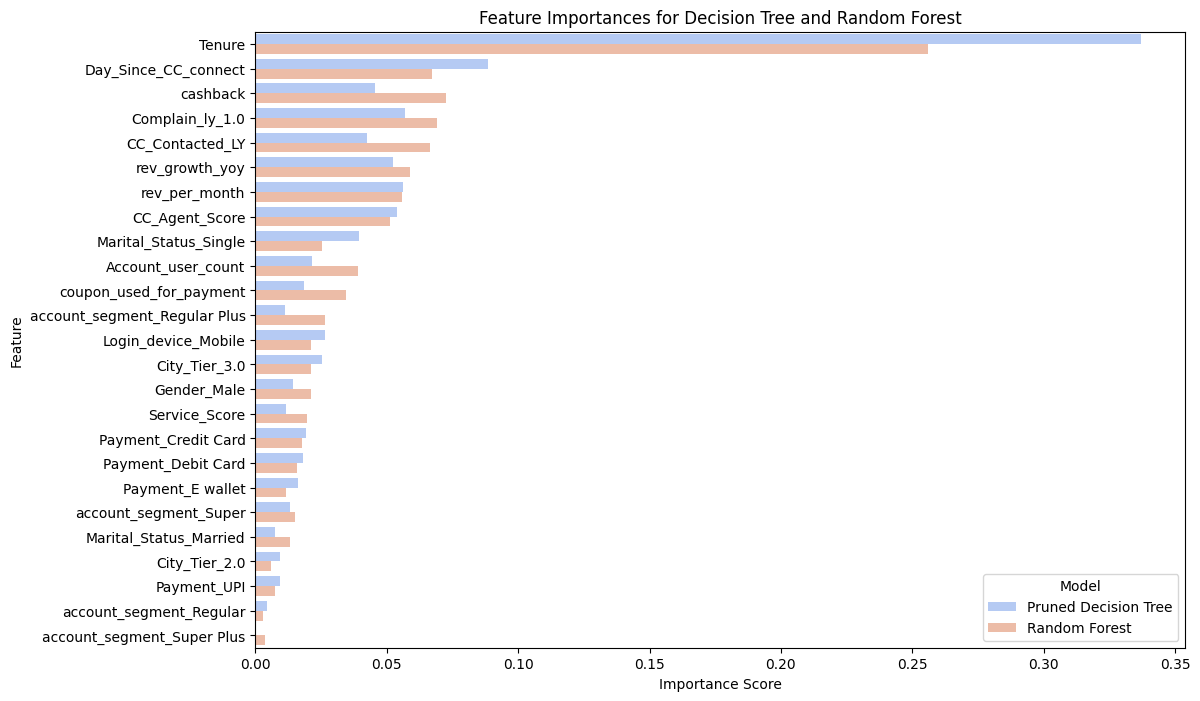

In [58]:
importances_dt = dt_pruned_model.feature_importances_
feature_names = X.columns


importances_rf = rf_model.feature_importances_
feature_names = X.columns

# Combine both DataFrames
importance_dfp = pd.DataFrame({'Feature': feature_names, 'Importance': importances_dt, 'Model': 'Pruned Decision Tree'})
importance_rfp = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf, 'Model': 'Random Forest'})

importance_combined = pd.concat([importance_dfp, importance_rfp], axis=0)

# Sort values for better visualization
importance_combined = importance_combined.sort_values(by='Importance', ascending=False)

# Plot the importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Model', data=importance_combined, palette='coolwarm')
plt.title('Feature Importances for Decision Tree and Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.show()

**Training models considering feature importance**

In [59]:
# List of important features having importance score more than 0.03
important_features = [
    'Tenure', 'CC_Contacted_LY', 'Account_user_count', 
    'CC_Agent_Score', 'rev_per_month', 'Complain_ly_1.0', 
    'rev_growth_yoy', 'Day_Since_CC_connect', 'cashback', 
    'Marital_Status_Single', 'Login_device_Mobile'
]

# Create a new dataframe with only the important features
X_train_scaled_imp = X_train_scaled_df[important_features]
X_test_scaled_imp = X_test_scaled_df[important_features]

# Display the reduced dataframe
print(X_train_scaled_imp.head())


        Tenure  CC_Contacted_LY  Account_user_count  CC_Agent_Score  \
8369  1.177863        -0.208973            2.255364        0.679137   
391   0.360781        -0.433381           -0.669585       -0.056139   
5959 -1.156656        -0.433381            0.305398       -0.056139   
3058 -1.039930        -0.657789            0.305398        0.679137   
4041 -0.339575        -0.882197            0.305398       -0.056139   

      rev_per_month  Complain_ly_1.0  rev_growth_yoy  Day_Since_CC_connect  \
8369       0.977757         1.632261       -0.583685              0.914093   
391       -0.411952         1.632261       -0.583685             -0.458175   
5959      -1.106806         1.632261       -0.583685              0.639639   
3058      -0.759379         1.632261       -0.317499             -1.007082   
4041      -0.759379         1.632261       -1.116057             -1.007082   

      cashback  Marital_Status_Single  Login_device_Mobile  
8369  2.458175              -0.682943      

In [60]:
log_model_imp = LogisticRegression()
log_model_imp.fit(X_train_scaled_imp, y_train)

LogisticRegression()

In [61]:
rf_model_imp = RandomForestClassifier()
rf_model_imp.fit(X_train_scaled_imp, y_train)

RandomForestClassifier()

In [62]:
dt_model_imp = DecisionTreeClassifier()
dt_model_imp.fit(X_train_scaled_imp, y_train)

DecisionTreeClassifier()

In [63]:
dt_pruned_model_imp = DecisionTreeClassifier(ccp_alpha=0.00018384480774599754)
dt_pruned_model_imp.fit(X_train_scaled_imp, y_train)

DecisionTreeClassifier(ccp_alpha=0.00018384480774599754)

In [64]:
models_imp = [log_model_imp, rf_model_imp, dt_model_imp, dt_pruned_model_imp]
model_names_imp = ['Logistic Regression (IMP)', 'Random Forest (IMP)', 'Decision Tree (IMP)', 'Pruned Decision Tree (IMP)']

for model_imp, name in zip(models_imp, model_names_imp):
    y_pred_test_imp = model_imp.predict(X_test_scaled_imp)    
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred_test_imp):.2f}")
    print(confusion_matrix(y_test, y_pred_test_imp))
    print(classification_report(y_test, y_pred_test_imp))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_test_imp):.2f}")
    print("\n")

Logistic Regression (IMP) Accuracy: 0.90
[[1567   35]
 [ 159  155]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1602
           1       0.82      0.49      0.62       314

    accuracy                           0.90      1916
   macro avg       0.86      0.74      0.78      1916
weighted avg       0.89      0.90      0.89      1916

ROC AUC Score: 0.74


Random Forest (IMP) Accuracy: 0.97
[[1590   12]
 [  54  260]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1602
           1       0.96      0.83      0.89       314

    accuracy                           0.97      1916
   macro avg       0.96      0.91      0.93      1916
weighted avg       0.97      0.97      0.96      1916

ROC AUC Score: 0.91


Decision Tree (IMP) Accuracy: 0.95
[[1556   46]
 [  54  260]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1602
 